In [1]:
#plan
#get timeslice sinograms
#get ungated sinograms
#                 this will require review of histogram replay, for the singles count rates and times

#maybe it is sufficient to operate on the listmode data, and then make the histogram

#then reconstruct
#and get dicom images ? or maybe interfile


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import kex_headers
import kex_data
import representation
import listmode
import petlink
import e7tools

In [3]:
listmode_dataset, listmode_paths = kex_data.listmode()

In [4]:
cylin = listmode.join_gates((listmode_dataset[:2]))
kanyl = listmode.join_gates(listmode_dataset[2:])

In [5]:
print((1,2,3)[1:])

(2, 3)


In [6]:
def get_timeslices(listmode_data, timestep):
    tt = petlink.get_timetag_indices(listmode_data)
    ts = petlink.get_timeslice_indices(tt, timestep)
    return np.split(listmode_data, ts)

In [7]:
timeslices = []
timestep = 100
slice_num = 0
for lm in listmode_dataset:
    timeslices.append(get_timeslices(lm, timestep)[slice_num])

In [8]:
#naming convention
#what phantom
#what gate
#what timeslice
#what timestep

#Cylinder-gate01-timestep100-slice0.L
#Cannula-ungated.L

#for header files
#duration (61 + 61 + x [s])
# timestep ms

In [9]:
for ts in timeslices:
    t = petlink.get_timetag_indices(ts)
    print(len(t), "ms")

100 ms
100 ms
100 ms
100 ms


In [10]:
print(listmode_paths[1:3])

['C:/Users/petct/Desktop/CylinderPET-Converted/CylinderPET-LM-01/CylinderPET-LM-01.l', 'C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-LM-00/KanylPET-LM-00.l']


In [11]:
ungated_folder = r"C:/Users/petct/Desktop/Hugo/Code/PythonMEX/kex_ungated/"
ungates = [cylin, kanyl]
phantom_str = ["Cylinder", "Kanyl"]
ung_opaths = []
for k,lm in enumerate(ungates):
    opath = ungated_folder + phantom_str[k] + "-ungated.l"
    with open(opath, 'wb') as f:
        f.write(lm)
    ung_opaths.append(opath)

In [12]:
timeslice_folder = r"C:/Users/petct/Desktop/Hugo/Code/PythonMEX/listmode_timeslices/"
slice_opaths = []
for k, lm in enumerate(timeslices):
    # work with original filename, remove .l, add timestep and slice_num
    fname = listmode_paths[k].split('/')[-1].split('.')[0] + "-timestep" + str(timestep) + "-slice" + str(slice_num) + ".l"
    opath = timeslice_folder + fname
    with open(opath, 'wb') as f:
        f.write(lm)
    slice_opaths.append(opath)

In [13]:
len(listmode_dataset[1])

16887694

In [14]:
A = "Apa"
print(A[:-1])

Ap


In [15]:
slice_hdr =[]
def pure_path(data_path):
    return data_path.split('.')[0]

def header_path(data_path):
    return pure_path(data_path) + ".hdr"

def sino_path(data_path):
    return pure_path(data_path) + ".s"

def fname(fpath):
    return fpath.split('/')[-1]



for opath in slice_opaths:
    slice_hdr.append(header_path(opath))
print(slice_hdr)

['C:/Users/petct/Desktop/Hugo/Code/PythonMEX/listmode_timeslices/CylinderPET-LM-00-timestep100-slice0.hdr', 'C:/Users/petct/Desktop/Hugo/Code/PythonMEX/listmode_timeslices/CylinderPET-LM-01-timestep100-slice0.hdr', 'C:/Users/petct/Desktop/Hugo/Code/PythonMEX/listmode_timeslices/KanylPET-LM-00-timestep100-slice0.hdr', 'C:/Users/petct/Desktop/Hugo/Code/PythonMEX/listmode_timeslices/KanylPET-LM-01-timestep100-slice0.hdr']


In [16]:
for k,ts in enumerate(timeslices):
    print(listmode_paths[k].split('/')[-1])
    print("total listmode word count", len(ts))

CylinderPET-LM-00.l
total listmode word count 28443
CylinderPET-LM-01.l
total listmode word count 28467
KanylPET-LM-00.l
total listmode word count 63903
KanylPET-LM-01.l
total listmode word count 62985


In [17]:
#try to histogram timeslice
#LM-01 header, start with one
#keep the same name, for easy reuse of main headers
slice_opaths = []
for k, lm_path in enumerate(listmode_paths):
    opath = timeslice_folder + pure_path(fname(lm_path)) + "-sino"
    slice_opaths.append(opath)
    hdr = header_path(lm_path) 
    cmd_str = "HistogramReplay"
    cmd_str += " --lmhd " + hdr
    cmd_str += " --lmdat " + lm_path
    cmd_str += " --opre " + opath + " --force "
    cmd_str += " --frame 0:2"
    cmd_str += " --lmode PROMPTS_RANDOMS "
    cmd_str += "-l 0"
    e7tools.run_tool(cmd_str)

stdout
 b'W 05/16/2020 19:25:45.385 (UTC+02:00) WARNING: problem compressing file:  C:\\Service\\Log\\MsgHandlerDLL.2019-04-05-11-13-55.log
'
stderr
 b'The system cannot find the file C:\\Siemens\\PET\\bin.win64\\ArchiveLogFile.exe.
'
stdout
 b''
stderr
 b''
stdout
 b''
stderr
 b''
stdout
 b''
stderr
 b''


In [18]:
print(len(cylin))

33754567


In [19]:
len(kanyl)

75366047

In [20]:
slice_opaths

['C:/Users/petct/Desktop/Hugo/Code/PythonMEX/listmode_timeslices/CylinderPET-LM-00-sino',
 'C:/Users/petct/Desktop/Hugo/Code/PythonMEX/listmode_timeslices/CylinderPET-LM-01-sino',
 'C:/Users/petct/Desktop/Hugo/Code/PythonMEX/listmode_timeslices/KanylPET-LM-00-sino',
 'C:/Users/petct/Desktop/Hugo/Code/PythonMEX/listmode_timeslices/KanylPET-LM-01-sino']

In [21]:

for k, lmdat in enumerate(ung_opaths):
    
    hdr = header_path(lmdat) 
    cmd_str = "HistogramReplay"
    cmd_str += " --lmhd " + hdr
    cmd_str += " --lmdat " + lmdat
    cmd_str += " --opre " + pure_path(lmdat)  + " --force "
    cmd_str += " --frame 0:122"
    cmd_str += " --lmode PROMPTS_RANDOMS "
    e7tools.run_tool(cmd_str, verbose=False)

In [22]:
#now reconstruct data
e7tools.run_tool("e7_recon -h")


stdout
 b'
                                                   (c) 2003-2015 Siemens Healthcare MI

e7_recon - calculate an image from a 2d or 3d sinogram

Usage:

 e7_recon (-e emission[,r,t,dim] [-u u-map] [-n norm[,r,t]|--np norm] [-w width]
           --oi image [--ois signed short integer image] [--oe emission]
           [--os scatter] [--fl] [--nrarc] [--naarc] [--dc] [-k a,b,...,n]
           [-r fore[,alim,wlim,klim]|ssrb|seg0] [--is iterations,subsets]
           [--chunk (pos,index)[,(pos, index)]] [--algo algorithm] [--gf]
           [--nosc] [--rs] [--tof] [--fltr filterName[,order],fwhm_xy,fwhm_z]
           [--mash4] [--izoom factor] [--lres] [--xoffs offset] [--yoffs offset]
           [--psf default|a,b,c,d,e,f,g,h,i] [--gf] [--resrv ip,port,port]
           [--regmt d1,d2,...d16] [--bp p0,p1,p2,...] [--reglt x,y]
           [--offs x,y,z] [--bmp path] [--mat a|a-b|a,b,...,n]
           [--model model|a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a2

0

In [23]:
import importlib
importlib.reload(kex_data);
importlib.reload(e7tools);

In [24]:
print(opath)

C:/Users/petct/Desktop/Hugo/Code/PythonMEX/listmode_timeslices/KanylPET-LM-01-sino


In [25]:
n_path = r"C:/Users/petct/Desktop/KanylPET-Converted/KanylPET-norm.n.hdr"

def recon(lmdat):
    
    #build command string
    #mostly copied from windows batch
    #the order is important
    cmd_str = "e7_recon "
    
    cmd_str += " --tof "
    cmd_str += " --mash4"
    cmd_str += " --algo op-osem"
    cmd_str += " --is 3,21 "
    cmd_str += " -n " + n_path
    #cmd_str += " --offs -1.156,0.198,-754.152,-0.091,0.03,-0.777"
    cmd_str += " --gf "
    cmd_str += " --quant 1"
    cmd_str += " -w 200 "
    
    
    cmd_str += " --fltr GAUSSIAN,5,5 "
    cmd_str += " -l 72 --fl"
    cmd_str += " --ecf"
    cmd_str += " --izoom 1"
    cmd_str += " --force"
    #cmd_str += " --cvrg 97"
    cmd_str += " --rs "
    
    cmd_str += " -e " + lmdat + ".mhdr" 
    cmd_str += " --oi " + lmdat + "-optof.mhdr"
    
    #cmd_str += " --dcr 1548425897"
    #cmd_str += " --reglt -249.512,-371.012"
    #cmd_str += " --bp 42.986000"
    
    e7tools.run_tool(command=cmd_str)

In [26]:
for k, lmdat in enumerate(slice_opaths):

    recon(lmdat)
    

stdout
 b''
stderr
 b"I 05/16/2020 19:25:55.172 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/16/2020 19:25:55.172 (UTC+01:00) Number of NUMA nodes: 1
I 05/16/2020 19:25:55.173 (UTC+01:00) Number of physical processor packages: 1
I 05/16/2020 19:25:55.173 (UTC+01:00) Number of processor cores: 4
I 05/16/2020 19:25:55.173 (UTC+01:00) Number of logical processors: 8
I 05/16/2020 19:25:55.173 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/16/2020 19:25:55.173 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/16/2020 19:25:55.173 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/16/2020 19:25:56.230 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/16/2020 19:25:56.287 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/16/2020 19:25:56.287 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/16/2020 19:25:56.287 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 05/16/2020 19:25:56.287 (UTC+01:0

stdout
 b''
stderr
 b"I 05/16/2020 19:26:35.015 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/16/2020 19:26:35.015 (UTC+01:00) Number of NUMA nodes: 1
I 05/16/2020 19:26:35.015 (UTC+01:00) Number of physical processor packages: 1
I 05/16/2020 19:26:35.015 (UTC+01:00) Number of processor cores: 4
I 05/16/2020 19:26:35.015 (UTC+01:00) Number of logical processors: 8
I 05/16/2020 19:26:35.015 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/16/2020 19:26:35.015 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/16/2020 19:26:35.015 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/16/2020 19:26:35.296 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/16/2020 19:26:35.297 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/16/2020 19:26:35.297 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/16/2020 19:26:35.297 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 05/16/2020 19:26:35.298 (UTC+01:0

stdout
 b''
stderr
 b"I 05/16/2020 19:27:12.303 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/16/2020 19:27:12.304 (UTC+01:00) Number of NUMA nodes: 1
I 05/16/2020 19:27:12.304 (UTC+01:00) Number of physical processor packages: 1
I 05/16/2020 19:27:12.304 (UTC+01:00) Number of processor cores: 4
I 05/16/2020 19:27:12.304 (UTC+01:00) Number of logical processors: 8
I 05/16/2020 19:27:12.304 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/16/2020 19:27:12.304 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/16/2020 19:27:12.304 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/16/2020 19:27:12.638 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/16/2020 19:27:12.639 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/16/2020 19:27:12.639 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/16/2020 19:27:12.640 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 05/16/2020 19:27:12.640 (UTC+01:0

stdout
 b''
stderr
 b"I 05/16/2020 19:27:48.338 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/16/2020 19:27:48.339 (UTC+01:00) Number of NUMA nodes: 1
I 05/16/2020 19:27:48.339 (UTC+01:00) Number of physical processor packages: 1
I 05/16/2020 19:27:48.339 (UTC+01:00) Number of processor cores: 4
I 05/16/2020 19:27:48.339 (UTC+01:00) Number of logical processors: 8
I 05/16/2020 19:27:48.339 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/16/2020 19:27:48.339 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/16/2020 19:27:48.339 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/16/2020 19:27:48.643 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/16/2020 19:27:48.644 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/16/2020 19:27:48.644 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/16/2020 19:27:48.644 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 05/16/2020 19:27:48.644 (UTC+01:0

In [27]:
def image_path(lmdat):
    p = pure_path(lmdat)
    return p + "-optof_000_000.v"

In [28]:
def rec_array(lmdat):
    path = image_path(lmdat)
    with open(path, 'rb') as f:
        rec_1d = np.fromfile(f, dtype=np.float32)
    return np.reshape(rec_1d, newshape=kex_headers.IMAGE_SHAPE)

In [29]:
timeslice_rec = []
for lmdat in slice_opaths:
    timeslice_rec.append(rec_array(lmdat))

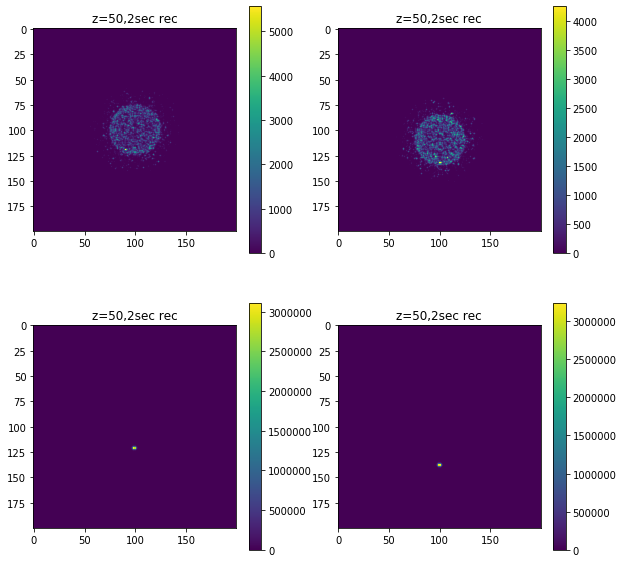

In [30]:
z = 50
plt.figure(figsize=(10,10))
for k, r in enumerate(timeslice_rec):
    plt.subplot(2,2,k+1)
    plt.imshow(r[z])
    plt.colorbar()
    plt.title("z=" + str(z) + ",2sec rec")
plt.show()

In [31]:
print(ung_opaths)

['C:/Users/petct/Desktop/Hugo/Code/PythonMEX/kex_ungated/Cylinder-ungated.l', 'C:/Users/petct/Desktop/Hugo/Code/PythonMEX/kex_ungated/Kanyl-ungated.l']


In [32]:
for lmdat in ung_opaths:
    recon(pure_path(lmdat))

stdout
 b''
stderr
 b"I 05/16/2020 19:28:24.495 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/16/2020 19:28:24.495 (UTC+01:00) Number of NUMA nodes: 1
I 05/16/2020 19:28:24.495 (UTC+01:00) Number of physical processor packages: 1
I 05/16/2020 19:28:24.495 (UTC+01:00) Number of processor cores: 4
I 05/16/2020 19:28:24.495 (UTC+01:00) Number of logical processors: 8
I 05/16/2020 19:28:24.495 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/16/2020 19:28:24.495 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/16/2020 19:28:24.495 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/16/2020 19:28:24.768 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/16/2020 19:28:24.769 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/16/2020 19:28:24.769 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/16/2020 19:28:24.769 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 05/16/2020 19:28:24.769 (UTC+01:0

stdout
 b''
stderr
 b"I 05/16/2020 19:29:02.386 (UTC+01:00) Intel(R) Core(TM) i7-7820HQ CPU @ 2.90GHz (1x)    memory: 32629 MByte
I 05/16/2020 19:29:02.386 (UTC+01:00) Number of NUMA nodes: 1
I 05/16/2020 19:29:02.386 (UTC+01:00) Number of physical processor packages: 1
I 05/16/2020 19:29:02.386 (UTC+01:00) Number of processor cores: 4
I 05/16/2020 19:29:02.386 (UTC+01:00) Number of logical processors: 8
I 05/16/2020 19:29:02.386 (UTC+01:00) Number of processor L1/L2/L3 caches: 8/4/1 
I 05/16/2020 19:29:02.386 (UTC+01:00) Hyper-Threadingin BIOS Enabled.
I 05/16/2020 19:29:02.386 (UTC+01:00)  supported CPU features: MMX,SSE,SSE2,SSE3,SSE4.1,SSE4.2,AVX
I 05/16/2020 19:29:02.704 (UTC+01:00) GPU Driver Version: 24.20.100.6286
I 05/16/2020 19:29:02.705 (UTC+01:00) GPU Driver supported CUDA Version: 9010
I 05/16/2020 19:29:02.706 (UTC+01:00) CUDA Run-time Version Used: 5000
I 05/16/2020 19:29:02.706 (UTC+01:00) Quadro M620 1017 MHz (Compute Capability 5.0)
I 05/16/2020 19:29:02.706 (UTC+01:0

In [33]:
ung_rec = []
for lmdat in ung_opaths:
    ung_rec.append(rec_array(lmdat))

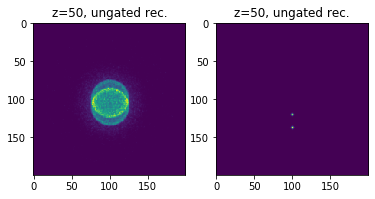

In [34]:

for k, r in enumerate(ung_rec):
    plt.subplot(1,2, k+1)
    plt.imshow(r[z])
    plt.title("z=" + str(z)+ ", ungated rec.")
plt.show()

In [35]:
A = np.zeros((2,3))
print(np.reshape(A, newshape=None))

[[0. 0. 0.]
 [0. 0. 0.]]


In [36]:
importlib.reload(e7tools)
importlib.reload(kex_data)

<module 'kex_data' from 'C:\\Users\\petct\\Desktop\\Hugo\\Code\\PythonMEX\\kex_data.py'>

In [37]:
efile = slice_opaths[0]
nfile = kex_data.NORM_PATH
oifile = efile + "-optof"
#print(efile, nfile, oifile)
r = e7tools.recon(efile+".mhdr", nfile, oifile, imgshape=kex_headers.IMAGE_SHAPE)

TypeError: recon() got an unexpected keyword argument 'imgshape'

In [ ]:
with open(oifile+ "_000_000.v", 'rb') as f:
    rec_1d = np.fromfile(f, dtype=np.float32)
img = np.reshape(rec_1d, kex_headers.IMAGE_SHAPE)
plt.imshow(img[50])